In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score

In [2]:
wine = load_wine()
X, y = wine.data, wine.target

In [4]:
# 표준화

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# PCA 적용

pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)

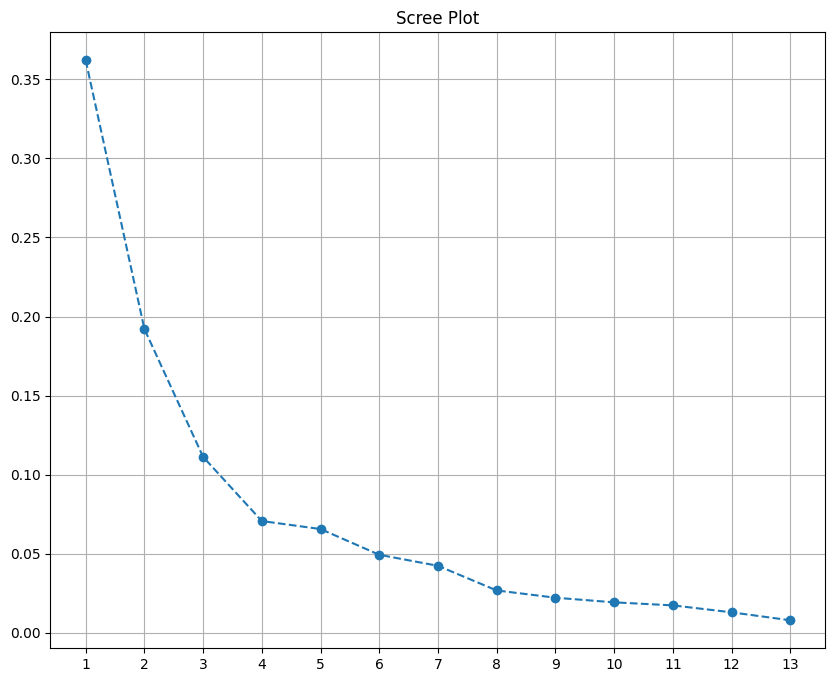

In [9]:
# 스크릿플롯

plt.figure(figsize=(10,8))
plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),                   # X축
    pca.explained_variance_ratio_,                                    # y축
    marker="o", linestyle='--'
)
plt.title('Scree Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True)
plt.show()

In [10]:
# 설명 비율 출력

for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f'PC{i+1}: {ratio:.2f}')

PC1: 0.36
PC2: 0.19
PC3: 0.11
PC4: 0.07
PC5: 0.07
PC6: 0.05
PC7: 0.04
PC8: 0.03
PC9: 0.02
PC10: 0.02
PC11: 0.02
PC12: 0.01
PC13: 0.01


In [13]:
# PCA 적용 - 2차원 축소

pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

In [35]:
# Kmeans

k = 3

kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X_pca_2d)                     # fit_predict(): 학습과 동시에 클러스터 라벨 예측을 한번에 해주는 함수

In [36]:
# 클러스터링 평가 (실루엣 스코어)

sil_score = silhouette_score(X_pca_2d,clusters)
sil_score

np.float64(0.5610505693103246)

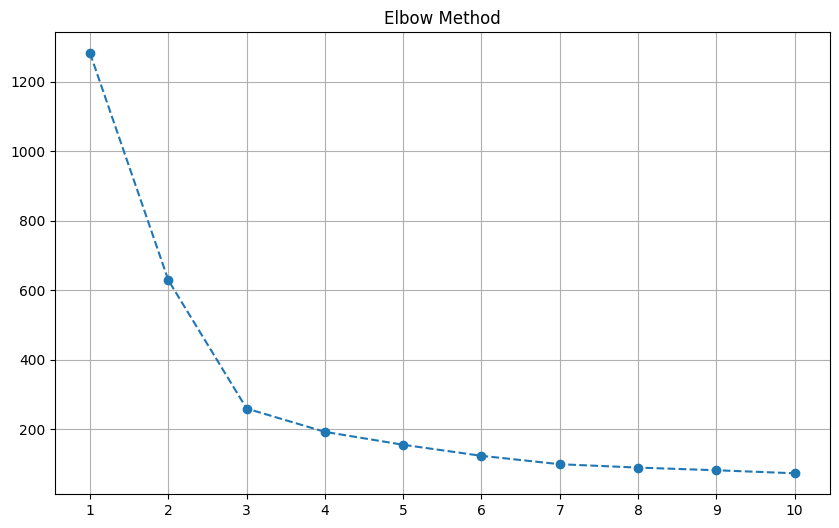

In [37]:
# 스크리 플랏

sse = []                                                    # sse 저장용 빈 리스트
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_pca_2d)
    sse.append(kmeans.inertia_)                             # inertia_: 각 클러스터 중심에서 데이터까지 거리 제곱합

plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.grid(True)
plt.xticks(k_range)
plt.show()

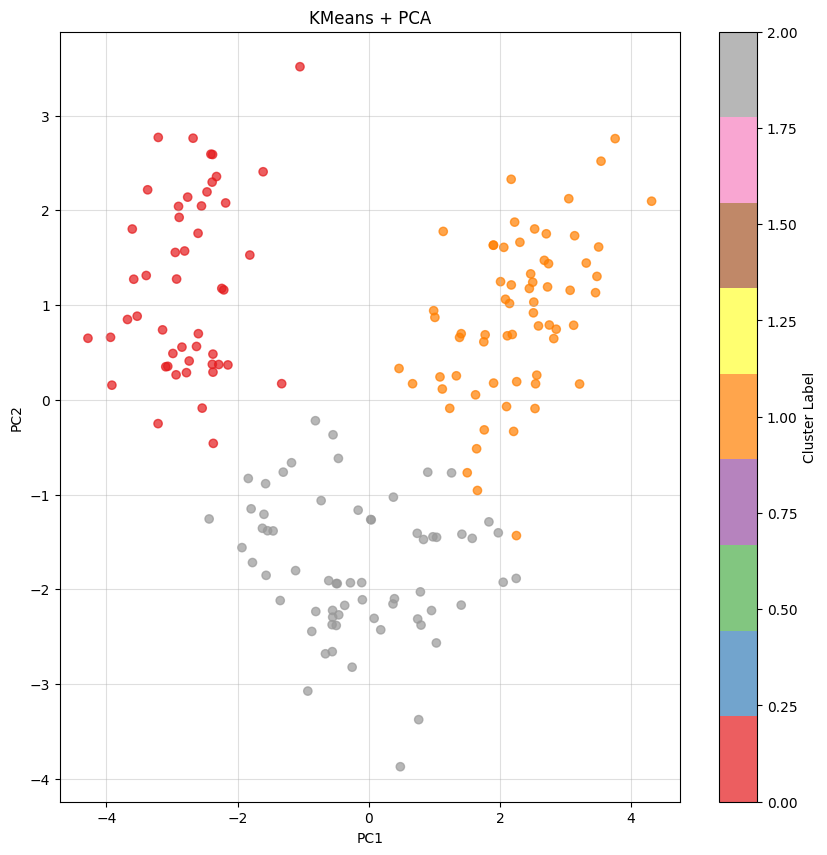

In [38]:
# 데이터 시각화

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_pca_2d[:,0], X_pca_2d[:, 1], c=clusters, cmap='Set1', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans + PCA')
plt.grid(True, alpha=0.4)
plt.colorbar(scatter, label='Cluster Label')
plt.show()